In [ ]:
!git clone https://github.com/zhn66776/Tidal_try.git

Cloning into 'Tidal_try'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 460 (delta 50), reused 0 (delta 0), pack-reused 355 (from 1)
Receiving objects: 100% (460/460), 59.30 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (181/181), done.


In [ ]:
cd Tidal_try/

/content/Tidal_try


In [ ]:
import pandas as pd


names = ["seconds", "year", "month", "day", "hour", "Water_Level_LAT", "flag"]

obs = pd.read_csv(
    "./dataProcessed/can1998",
    names=names,
    skipinitialspace=True,
    delim_whitespace=True,
    na_values="9.990",
)

obs['time'] = pd.to_datetime(obs[['year', 'month', 'day', 'hour']])

obs = obs.drop(columns=["year", "month", "day", "hour"])

obs = obs.set_index('time')

obs.head(5)

<ipython-input-3-222c38f42ae7>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  obs = pd.read_csv(


,seconds,Water_Level_LAT,flag
time,,,
1998-01-01 00:00:00,0,1.20,0
1998-01-01 01:00:00,3600,1.43,0
1998-01-01 02:00:00,7200,1.73,0
1998-01-01 03:00:00,10800,2.03,0
1998-01-01 04:00:00,14400,2.38,0


In [ ]:
obs.to_csv('./dataProcessed/cannew.csv', index=True)


In [ ]:
import pandas as pd
import numpy as np

obs = pd.read_csv('./dataProcessed/cannew.csv')
bad = obs["flag"] == 2
corrected = obs["flag"] == 1

obs.loc[bad, "elev"] = np.nan

obs["anomaly"] = obs["elev"] - obs["elev"].mean()

obs["anomaly"] = obs["anomaly"].interpolate()

obs.to_csv('./dataProcessed/procan.csv', index=False)

Data loading...


100%|██████████| 8740/8740 [00:00<00:00, 215570.63it/s]

测试集大小为437



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Model loading...
Configuration Parameters:
 - Batch size: 20
 - Lookback: 20
 - Epochs: 7
 - Learning rate: 0.01
 - Weight decay: 1e-05
Training...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 Batch: 0 | Loss: 0.18829938769340515
Epoch: 0 Batch: 10 | Loss: 0.02147017791867256
Epoch: 0 Batch: 20 | Loss: 0.012600318528711796
Epoch: 0 Batch: 30 | Loss: 0.03724517673254013
Epoch: 0 Batch: 40 | Loss: 0.005623013246804476
Epoch: 0 Batch: 50 | Loss: 0.061892613768577576
Epoch: 0 Batch: 60 | Loss: 0.008939328603446484
Epoch: 0 Batch: 70 | Loss: 0.03439734876155853
Epoch: 0 Batch: 80 | Loss: 0.02768213115632534
Epoch: 0 Batch: 90 | Loss: 0.049707330763339996
Epoch: 0 Batch: 100 | Loss: 0.10921996831893921
Epoch: 0 Batch: 110 | Loss: 0.0039038502145558596
Epoch: 0 Batch: 120 | Loss: 0.04053090140223503
Epoch: 0 Batch: 130 | Loss: 0.018946398049592972
Epoch: 0 Batch: 140 | Loss: 0.021685490384697914
Epoch: 0 Batch: 150 | Loss: 0.01825702376663685
Epoch: 0 Batch: 160 | Loss: 0.025304600596427917
Epoch: 0 Batch: 170 | Loss: 0.027578439563512802
Epoch: 0 Batch: 180 | Loss: 0.006175732705742121
Epoch: 0 Batch: 190 | Loss: 0.03139441832900047
Epoch: 0 Batch: 200 | Loss: 0.018288699

22it [00:00, 93.48it/s] 

Epoch: 0 Validation Loss: 0.01788277722951025



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 Batch: 0 | Loss: 0.0227593295276165
Epoch: 1 Batch: 10 | Loss: 0.02515113167464733
Epoch: 1 Batch: 20 | Loss: 0.013570308685302734
Epoch: 1 Batch: 30 | Loss: 0.03705119341611862
Epoch: 1 Batch: 40 | Loss: 0.003848694497719407
Epoch: 1 Batch: 50 | Loss: 0.05048749968409538
Epoch: 1 Batch: 60 | Loss: 0.004635176621377468
Epoch: 1 Batch: 70 | Loss: 0.03852640092372894
Epoch: 1 Batch: 80 | Loss: 0.023125359788537025
Epoch: 1 Batch: 90 | Loss: 0.0359957255423069
Epoch: 1 Batch: 100 | Loss: 0.08720619231462479
Epoch: 1 Batch: 110 | Loss: 0.0035774949938058853
Epoch: 1 Batch: 120 | Loss: 0.042178887873888016
Epoch: 1 Batch: 130 | Loss: 0.019220098853111267
Epoch: 1 Batch: 140 | Loss: 0.021528806537389755
Epoch: 1 Batch: 150 | Loss: 0.0184608343988657
Epoch: 1 Batch: 160 | Loss: 0.02493339776992798
Epoch: 1 Batch: 170 | Loss: 0.027705473825335503
Epoch: 1 Batch: 180 | Loss: 0.00591736426576972
Epoch: 1 Batch: 190 | Loss: 0.03139354661107063
Epoch: 1 Batch: 200 | Loss: 0.01744812726974

22it [00:00, 106.30it/s]

Epoch: 1 Validation Loss: 0.01837276020737354



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 2 Batch: 0 | Loss: 0.023293234407901764
Epoch: 2 Batch: 10 | Loss: 0.028302185237407684
Epoch: 2 Batch: 20 | Loss: 0.013685955666005611
Epoch: 2 Batch: 30 | Loss: 0.037294913083314896
Epoch: 2 Batch: 40 | Loss: 0.003991857636719942
Epoch: 2 Batch: 50 | Loss: 0.046156711876392365
Epoch: 2 Batch: 60 | Loss: 0.004210084211081266
Epoch: 2 Batch: 70 | Loss: 0.0380571074783802
Epoch: 2 Batch: 80 | Loss: 0.02327866479754448
Epoch: 2 Batch: 90 | Loss: 0.03345061466097832
Epoch: 2 Batch: 100 | Loss: 0.07534496486186981
Epoch: 2 Batch: 110 | Loss: 0.0030877774115651846
Epoch: 2 Batch: 120 | Loss: 0.04305173084139824
Epoch: 2 Batch: 130 | Loss: 0.01852189563214779
Epoch: 2 Batch: 140 | Loss: 0.02137068286538124
Epoch: 2 Batch: 150 | Loss: 0.01832159236073494
Epoch: 2 Batch: 160 | Loss: 0.024517325684428215
Epoch: 2 Batch: 170 | Loss: 0.027523433789610863
Epoch: 2 Batch: 180 | Loss: 0.005862044170498848
Epoch: 2 Batch: 190 | Loss: 0.03097592294216156
Epoch: 2 Batch: 200 | Loss: 0.0162595771

22it [00:00, 101.78it/s]

Epoch: 2 Validation Loss: 0.018661521851770054



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 3 Batch: 0 | Loss: 0.023297905921936035
Epoch: 3 Batch: 10 | Loss: 0.028868041932582855
Epoch: 3 Batch: 20 | Loss: 0.013620260171592236
Epoch: 3 Batch: 30 | Loss: 0.03773057833313942
Epoch: 3 Batch: 40 | Loss: 0.0038858181796967983
Epoch: 3 Batch: 50 | Loss: 0.045725222676992416
Epoch: 3 Batch: 60 | Loss: 0.007196072954684496
Epoch: 3 Batch: 70 | Loss: 0.03288764879107475
Epoch: 3 Batch: 80 | Loss: 0.023635143414139748
Epoch: 3 Batch: 90 | Loss: 0.029565881937742233
Epoch: 3 Batch: 100 | Loss: 0.06105794757604599
Epoch: 3 Batch: 110 | Loss: 0.002848125994205475
Epoch: 3 Batch: 120 | Loss: 0.05527288466691971
Epoch: 3 Batch: 130 | Loss: 0.02124015800654888
Epoch: 3 Batch: 140 | Loss: 0.020674273371696472
Epoch: 3 Batch: 150 | Loss: 0.01874568499624729
Epoch: 3 Batch: 160 | Loss: 0.02439180389046669
Epoch: 3 Batch: 170 | Loss: 0.027815749868750572
Epoch: 3 Batch: 180 | Loss: 0.005957377143204212
Epoch: 3 Batch: 190 | Loss: 0.03085995279252529
Epoch: 3 Batch: 200 | Loss: 0.01591856

22it [00:00, 92.79it/s] 

Epoch: 3 Validation Loss: 0.016954825259235026



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 4 Batch: 0 | Loss: 0.024778103455901146
Epoch: 4 Batch: 10 | Loss: 0.025176744908094406
Epoch: 4 Batch: 20 | Loss: 0.013156379573047161
Epoch: 4 Batch: 30 | Loss: 0.037645358592271805
Epoch: 4 Batch: 40 | Loss: 0.004192857537418604
Epoch: 4 Batch: 50 | Loss: 0.03922773525118828
Epoch: 4 Batch: 60 | Loss: 0.006967355031520128
Epoch: 4 Batch: 70 | Loss: 0.030624689534306526
Epoch: 4 Batch: 80 | Loss: 0.02343573607504368
Epoch: 4 Batch: 90 | Loss: 0.026894038543105125
Epoch: 4 Batch: 100 | Loss: 0.04422575980424881
Epoch: 4 Batch: 110 | Loss: 0.007085571996867657
Epoch: 4 Batch: 120 | Loss: 0.04517264664173126
Epoch: 4 Batch: 130 | Loss: 0.010351670905947685
Epoch: 4 Batch: 140 | Loss: 0.02112511172890663
Epoch: 4 Batch: 150 | Loss: 0.01825300231575966
Epoch: 4 Batch: 160 | Loss: 0.024900928139686584
Epoch: 4 Batch: 170 | Loss: 0.0271921344101429
Epoch: 4 Batch: 180 | Loss: 0.00663167517632246
Epoch: 4 Batch: 190 | Loss: 0.03100479580461979
Epoch: 4 Batch: 200 | Loss: 0.01684070937

22it [00:00, 73.01it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 4 Validation Loss: 0.01688095637374901


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 5 Batch: 0 | Loss: 0.025227472186088562
Epoch: 5 Batch: 10 | Loss: 0.026581205427646637
Epoch: 5 Batch: 20 | Loss: 0.012762968428432941
Epoch: 5 Batch: 30 | Loss: 0.036874737590551376
Epoch: 5 Batch: 40 | Loss: 0.004548919387161732
Epoch: 5 Batch: 50 | Loss: 0.037009984254837036
Epoch: 5 Batch: 60 | Loss: 0.006964331492781639
Epoch: 5 Batch: 70 | Loss: 0.02910441905260086
Epoch: 5 Batch: 80 | Loss: 0.022954752668738365
Epoch: 5 Batch: 90 | Loss: 0.021205460652709007
Epoch: 5 Batch: 100 | Loss: 0.04112061485648155
Epoch: 5 Batch: 110 | Loss: 0.004749410320073366
Epoch: 5 Batch: 120 | Loss: 0.0443446971476078
Epoch: 5 Batch: 130 | Loss: 0.010374779812991619
Epoch: 5 Batch: 140 | Loss: 0.021467916667461395
Epoch: 5 Batch: 150 | Loss: 0.01806243136525154
Epoch: 5 Batch: 160 | Loss: 0.024954751133918762
Epoch: 5 Batch: 170 | Loss: 0.02734021469950676
Epoch: 5 Batch: 180 | Loss: 0.006518506910651922
Epoch: 5 Batch: 190 | Loss: 0.0310555100440979
Epoch: 5 Batch: 200 | Loss: 0.017087496

22it [00:00, 101.45it/s]

Epoch: 5 Validation Loss: 0.017132248075208044



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 6 Batch: 0 | Loss: 0.02579801343381405
Epoch: 6 Batch: 10 | Loss: 0.026475554332137108
Epoch: 6 Batch: 20 | Loss: 0.01243422832340002
Epoch: 6 Batch: 30 | Loss: 0.03729034960269928
Epoch: 6 Batch: 40 | Loss: 0.004402428865432739
Epoch: 6 Batch: 50 | Loss: 0.035133447498083115
Epoch: 6 Batch: 60 | Loss: 0.006179783493280411
Epoch: 6 Batch: 70 | Loss: 0.029700331389904022
Epoch: 6 Batch: 80 | Loss: 0.022780191153287888
Epoch: 6 Batch: 90 | Loss: 0.02092876471579075
Epoch: 6 Batch: 100 | Loss: 0.04231999069452286
Epoch: 6 Batch: 110 | Loss: 0.005698658060282469
Epoch: 6 Batch: 120 | Loss: 0.04454469680786133
Epoch: 6 Batch: 130 | Loss: 0.011088409461081028
Epoch: 6 Batch: 140 | Loss: 0.02123812399804592
Epoch: 6 Batch: 150 | Loss: 0.01798463612794876
Epoch: 6 Batch: 160 | Loss: 0.024796724319458008
Epoch: 6 Batch: 170 | Loss: 0.02719513140618801
Epoch: 6 Batch: 180 | Loss: 0.006588924676179886
Epoch: 6 Batch: 190 | Loss: 0.03078102134168148
Epoch: 6 Batch: 200 | Loss: 0.01684352941

22it [00:00, 94.76it/s] 

Epoch: 6 Validation Loss: 0.016800170896813713
Testing...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
22it [00:00, 60.52it/s]


r2Score:  0.19194297559499074
meanSquaredError:  0.02065036421265138
RMSE:  0.14370234588430134
meanAbsoluteError:  0.12031591247161957


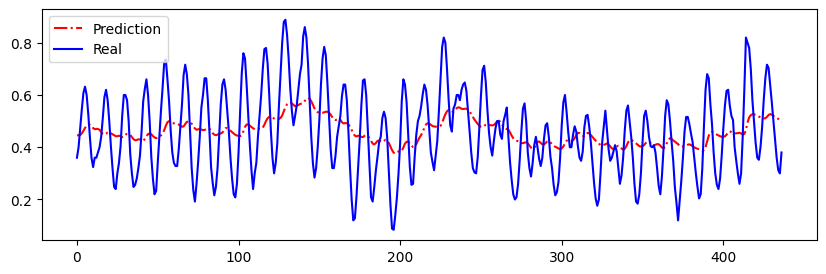

In [ ]:
import torch
from torch.utils.data import DataLoader
from config import Config

from utils.dataTools import *
from utils.models import CNNBiLSTM
from utils.trainer import CNNBiLstm_evaluate,CNNBiLstmtrain
if __name__ == '__main__':
    config = Config()

    print("Data loading...")
    dataset = mydataReader("./dataProcessed/procan.csv")

    (train_X, train_Y), (val_X, val_Y), (test_X, test_Y) = dataset.split(
        lookback=config.lookback, n_steps=config.n_steps, trainSet_ratio=0.9, valSet_ratio=0.05)

    trainSet = custom_dataset(train_X, train_Y)
    valSet = custom_dataset(val_X, val_Y)
    testSet = custom_dataset(test_X, test_Y)

    train_loader = DataLoader(trainSet, batch_size=config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(valSet, batch_size=config.batch_size,
                            shuffle=False, pin_memory=True, num_workers=4, drop_last=False)
    test_loader = DataLoader(testSet, batch_size=config.batch_size,
                             shuffle=False, pin_memory=True, num_workers=4, drop_last=False)

    print("Model loading...")
    model = CNNBiLSTM(hidden_size=15, num_layers=2).to(config.device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                  lr=config.learning_rate, weight_decay=config.weight_decay)
    # optimizer = torch.optim.SGD(model.parameters(),
    #                         lr=config.learning_rate,
    #                         momentum=0.9,
    #                         weight_decay=config.weight_decay)

    print(f"Configuration Parameters:")
    print(f" - Batch size: {config.batch_size}")
    print(f" - Lookback: {config.lookback}")
    print(f" - Epochs: {config.epoch_size}")
    print(f" - Learning rate: {config.learning_rate}")
    print(f" - Weight decay: {config.weight_decay}")

    print("Training...")
    model = CNNBiLstmtrain(model,
                           trainloader=train_loader,
                           valloader=val_loader,
                           criterion=criterion,
                           optimizer=optimizer,
                           config=config)

    print("Testing...")
    CNNBiLstm_evaluate(model, test_loader, config)


## multistep


Data loading...


100%|██████████| 8736/8736 [00:00<00:00, 266743.15it/s]

测试集大小为1748
Model loading...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([30, 1])) that is different to the input size (torch.Size([30])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 Batch: 0 | Loss: 0.3745391845703125
Epoch: 0 Batch: 10 | Loss: 0.06996577978134155
Epoch: 0 Batch: 20 | Loss: 0.04395844340324402
Epoch: 0 Batch: 30 | Loss: 0.02229577898979187
Epoch: 0 Batch: 40 | Loss: 0.007793935388326645
Epoch: 0 Batch: 50 | Loss: 0.0068630814552307125
Epoch: 0 Batch: 60 | Loss: 0.040649181604385375
Epoch: 0 Batch: 70 | Loss: 0.021620170772075654
Epoch: 0 Batch: 80 | Loss: 0.048785412311553956
Epoch: 0 Batch: 90 | Loss: 0.05050415992736816
Epoch: 0 Batch: 100 | Loss: 0.030699461698532104
Epoch: 0 Batch: 110 | Loss: 0.01475107967853546
Epoch: 0 Batch: 120 | Loss: 0.005139243602752685
Epoch: 0 Batch: 130 | Loss: 0.0255665123462677
Epoch: 0 Batch: 140 | Loss: 0.02158387899398804
Epoch: 0 Batch: 150 | Loss: 0.0537428617477417
Epoch: 0 Batch: 160 | Loss: 0.02217835485935211
Epoch: 0 Batch: 170 | Loss: 0.012077407538890838
Epoch: 0 Batch: 180 | Loss: 0.004279232397675514
Epoch: 0 Batch: 190 | Loss: 0.02133035659790039
Epoch: 0 Batch: 200 | Loss: 0.02139619290828

30it [00:01, 19.28it/s]

Epoch: 0 Validation Loss: 0.025997202113995643



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([30, 1])) that is different to the input size (torch.Size([30])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 Batch: 0 | Loss: 0.023477812111377717
Epoch: 1 Batch: 10 | Loss: 0.028086906671524046
Epoch: 1 Batch: 20 | Loss: 0.04179895520210266
Epoch: 1 Batch: 30 | Loss: 0.023025967180728912
Epoch: 1 Batch: 40 | Loss: 0.008789680898189545
Epoch: 1 Batch: 50 | Loss: 0.005019612982869149
Epoch: 1 Batch: 60 | Loss: 0.044384852051734924
Epoch: 1 Batch: 70 | Loss: 0.021381542086601257
Epoch: 1 Batch: 80 | Loss: 0.04318499565124512
Epoch: 1 Batch: 90 | Loss: 0.04204685986042023
Epoch: 1 Batch: 100 | Loss: 0.02580278515815735
Epoch: 1 Batch: 110 | Loss: 0.012227791547775268
Epoch: 1 Batch: 120 | Loss: 0.004565101116895676
Epoch: 1 Batch: 130 | Loss: 0.024143910408020018
Epoch: 1 Batch: 140 | Loss: 0.022113452851772308
Epoch: 1 Batch: 150 | Loss: 0.05228187441825867
Epoch: 1 Batch: 160 | Loss: 0.021522919833660125
Epoch: 1 Batch: 170 | Loss: 0.0109013132750988
Epoch: 1 Batch: 180 | Loss: 0.004117746651172638
Epoch: 1 Batch: 190 | Loss: 0.020597928762435914
Epoch: 1 Batch: 200 | Loss: 0.02304801

30it [00:01, 25.95it/s]

Epoch: 1 Validation Loss: 0.02647868232001697
Testing...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
59it [00:02, 25.78it/s]


r2Score:  -0.004179494518364191
meanSquaredError:  0.024189000292098375
RMSE:  0.15552813344246877
meanAbsoluteError:  0.12699073312284095


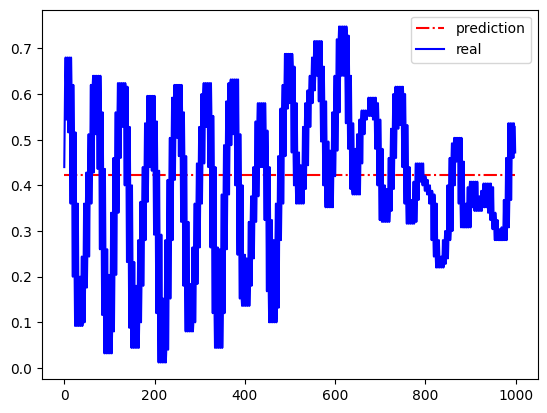

In [ ]:
import torch
from torch.utils.data import DataLoader
from config import Config

from utils.dataTools import *
from utils.models import CNNBiLSTM
from utils.trainer import CNNBiLstm_evaluate,CNNBiLstmtrain
if __name__ == '__main__':
    config = Config()

    print("Data loading...")
    dataset = mydataReader("./dataProcessed/procan.csv")


    (train_X, train_Y), (val_X, val_Y), (test_X, test_Y) = dataset.split(
        lookback=config.lookback, n_steps=config.n_steps, trainSet_ratio=0.7, valSet_ratio=0.1)

    trainSet = custom_dataset(train_X, train_Y)
    valSet = custom_dataset(val_X, val_Y)
    testSet = custom_dataset(test_X, test_Y)

    train_loader = DataLoader(trainSet, batch_size=config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(valSet, batch_size=config.batch_size,
                            shuffle=False, pin_memory=True, num_workers=4, drop_last=False)
    test_loader = DataLoader(testSet, batch_size=config.batch_size,
                             shuffle=False, pin_memory=True, num_workers=4, drop_last=False)

    print("Model loading...")
    model = CNNBiLSTM(hidden_size=12, num_layers=3).to(config.device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                  lr=config.learning_rate, weight_decay=config.weight_decay)

    print("Training...")
    model = CNNBiLstmtrain(model,
                           trainloader=train_loader,
                           valloader=val_loader,
                           criterion=criterion,
                           optimizer=optimizer,
                           config=config)

    print("Testing...")
    CNNBiLstm_evaluate(model, test_loader, config)


Data loading...


100%|██████████| 8750/8750 [00:00<00:00, 235230.29it/s]

测试集大小为1750
Model loading...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 0 batch: 0 | loss: 0.37048080563545227
Epoch: 0 batch: 10 | loss: 0.35216668248176575
Epoch: 0 batch: 20 | loss: 0.2419089525938034
Epoch: 0 batch: 30 | loss: 0.20684541761875153
Epoch: 0 batch: 40 | loss: 0.14661169052124023
Epoch: 0 batch: 50 | loss: 0.07439924776554108
Epoch: 0 batch: 60 | loss: 0.04903411120176315
Epoch: 0 batch: 70 | loss: 0.07374612987041473
Epoch: 0 batch: 80 | loss: 0.03481635823845863
Epoch: 0 batch: 90 | loss: 0.04891548305749893
Epoch: 0 batch: 100 | loss: 0.025575974956154823
Epoch: 0 batch: 110 | loss: 0.01093794871121645
Epoch: 0 batch: 120 | loss: 0.012801499105989933
Epoch: 0 batch: 130 | loss: 0.030919047072529793
Epoch: 0 batch: 140 | loss: 0.027889151126146317
Epoch: 0 batch: 150 | loss: 0.029558813199400902
Epoch: 0 batch: 160 | loss: 0.023773085325956345
Epoch: 0 batch: 170 | loss: 0.007063393015414476
Epoch: 0 batch: 180 | loss: 0.012210969813168049
Epoch: 0 batch: 190 | loss: 0.02491161599755287
Epoch: 0 batch: 200 | loss: 0.03657721355557

30it [00:00, 121.09it/s]

Epoch: 0 valLoss: 0.025717262118836272



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 1 batch: 0 | loss: 0.025085952132940292
Epoch: 1 batch: 10 | loss: 0.03513346239924431
Epoch: 1 batch: 20 | loss: 0.04306581988930702
Epoch: 1 batch: 30 | loss: 0.02916915901005268
Epoch: 1 batch: 40 | loss: 0.008858051151037216
Epoch: 1 batch: 50 | loss: 0.007587912026792765
Epoch: 1 batch: 60 | loss: 0.024232205003499985
Epoch: 1 batch: 70 | loss: 0.03622480481863022
Epoch: 1 batch: 80 | loss: 0.053461313247680664
Epoch: 1 batch: 90 | loss: 0.041142869740724564
Epoch: 1 batch: 100 | loss: 0.019187724217772484
Epoch: 1 batch: 110 | loss: 0.01292666420340538
Epoch: 1 batch: 120 | loss: 0.011574102565646172
Epoch: 1 batch: 130 | loss: 0.021784061565995216
Epoch: 1 batch: 140 | loss: 0.03880530223250389
Epoch: 1 batch: 150 | loss: 0.03206668794155121
Epoch: 1 batch: 160 | loss: 0.022729268297553062
Epoch: 1 batch: 170 | loss: 0.0064369263127446175
Epoch: 1 batch: 180 | loss: 0.009326408617198467
Epoch: 1 batch: 190 | loss: 0.017451297491788864
Epoch: 1 batch: 200 | loss: 0.0337886

30it [00:00, 132.29it/s]

Epoch: 1 valLoss: 0.02548672414868354
Testing... 58



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
59it [00:00, 143.63it/s]


r2Score:  -0.04794046116242656
meanSquaredError:  0.025240644121785033
RMSE:  0.15887304403763727
meanAbsoluteError:  0.13078445345269782


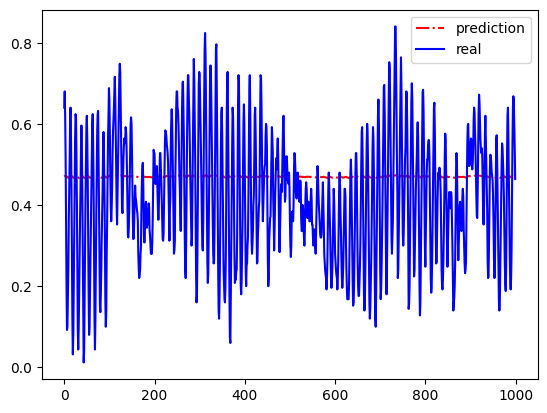

In [ ]:
import torch
from torch.utils.data import DataLoader
from config import Config

from utils.dataTools import *
from utils.models import CNNBiLSTM
from utils.trainer import CNNBiLstm_evaluate,CNNBiLstmtrain

if __name__ == '__main__':
    config = Config()

    print("Data loading...")

    dataset = mydataReader("./dataProcessed/procan.csv")

    (train_X ,train_Y ), (val_X,val_Y), (test_X ,test_Y )= dataset.split(lookback=config.lookback,trainSet_ratio=0.7,valSet_ratio=0.1)

    trainSet = custom_dataset(train_X,train_Y)
    valSet = custom_dataset(val_X,val_Y)
    testSet = custom_dataset(test_X,test_Y)

    train_loader = DataLoader(trainSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(valSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=False)
    test_loader = DataLoader(testSet, batch_size = config.batch_size,
                            shuffle=False, pin_memory=True, num_workers=4, drop_last=False)


    print("Model loading...")
    model = CNNBiLSTM(hidden_size=12,num_layers=2).to(config.device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                 lr=config.learning_rate, weight_decay=config.weight_decay)

    print("Training...")
    model = CNNBiLstmtrain(model,
                  trainloader=train_loader,
                  valloader=val_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  config=config)

    print("Testing...", round(len(testSet)/config.batch_size))
    CNNBiLstm_evaluate(model, test_loader, config)


Data loading...


100%|██████████| 2946/2946 [00:00<00:00, 247138.28it/s]

测试集大小为590
Model loading...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 Batch: 0 | Loss: 0.08949194103479385
Epoch: 0 Batch: 10 | Loss: 0.0511748269200325
Epoch: 0 Batch: 20 | Loss: 0.037265654653310776
Epoch: 0 Batch: 30 | Loss: 0.005869606044143438
Epoch: 0 Batch: 40 | Loss: 0.003164602443575859
Epoch: 0 Batch: 50 | Loss: 0.011637452058494091
Epoch: 0 Batch: 60 | Loss: 0.03606419637799263
Epoch: 0 Batch: 70 | Loss: 0.04188055917620659
Epoch: 0 Batch: 80 | Loss: 0.04817206412553787
Epoch: 0 Batch: 90 | Loss: 0.07001892477273941
Epoch: 0 Batch: 100 | Loss: 0.1461859792470932
Epoch: 0 Batch: 110 | Loss: 0.17179173231124878
Epoch: 0 Batch: 120 | Loss: 0.20650844275951385
Epoch: 0 Batch: 130 | Loss: 0.21926532685756683
Epoch: 0 Batch: 140 | Loss: 0.21416506171226501
Epoch: 0 Batch: 150 | Loss: 0.13879327476024628
Epoch: 0 Batch: 160 | Loss: 0.11068591475486755
Epoch: 0 Batch: 170 | Loss: 0.08235716074705124
Epoch: 0 Batch: 180 | Loss: 0.059990428388118744
Epoch: 0 Batch: 190 | Loss: 0.0543595589697361
Epoch: 0 Batch: 200 | Loss: 0.0425943098962307


30it [00:00, 131.71it/s]

Epoch: 0 Validation Loss: 0.05436199904676475



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 Batch: 0 | Loss: 0.05512635409832001
Epoch: 1 Batch: 10 | Loss: 0.05850657448172569
Epoch: 1 Batch: 20 | Loss: 0.019582774490118027
Epoch: 1 Batch: 30 | Loss: 0.02104596048593521
Epoch: 1 Batch: 40 | Loss: 0.024869946762919426
Epoch: 1 Batch: 50 | Loss: 0.011282218620181084
Epoch: 1 Batch: 60 | Loss: 0.02174914814531803
Epoch: 1 Batch: 70 | Loss: 0.037250787019729614
Epoch: 1 Batch: 80 | Loss: 0.056500621140003204
Epoch: 1 Batch: 90 | Loss: 0.09514160454273224
Epoch: 1 Batch: 100 | Loss: 0.1405792385339737
Epoch: 1 Batch: 110 | Loss: 0.16590048372745514
Epoch: 1 Batch: 120 | Loss: 0.1756305694580078
Epoch: 1 Batch: 130 | Loss: 0.18364986777305603
Epoch: 1 Batch: 140 | Loss: 0.2150237113237381
Epoch: 1 Batch: 150 | Loss: 0.14361631870269775
Epoch: 1 Batch: 160 | Loss: 0.10906115174293518
Epoch: 1 Batch: 170 | Loss: 0.07125984877347946
Epoch: 1 Batch: 180 | Loss: 0.056920479983091354
Epoch: 1 Batch: 190 | Loss: 0.03837743401527405
Epoch: 1 Batch: 200 | Loss: 0.03574494272470474


30it [00:00, 139.48it/s]

Epoch: 1 Validation Loss: 0.04356040270994516



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 2 Batch: 0 | Loss: 0.0636754110455513
Epoch: 2 Batch: 10 | Loss: 0.034113384783267975
Epoch: 2 Batch: 20 | Loss: 0.014803780242800713
Epoch: 2 Batch: 30 | Loss: 0.019915809854865074
Epoch: 2 Batch: 40 | Loss: 0.021038921549916267
Epoch: 2 Batch: 50 | Loss: 0.01549474336206913
Epoch: 2 Batch: 60 | Loss: 0.016406914219260216
Epoch: 2 Batch: 70 | Loss: 0.022341541945934296
Epoch: 2 Batch: 80 | Loss: 0.0592607706785202
Epoch: 2 Batch: 90 | Loss: 0.08119044452905655
Epoch: 2 Batch: 100 | Loss: 0.1260058730840683
Epoch: 2 Batch: 110 | Loss: 0.09994296729564667
Epoch: 2 Batch: 120 | Loss: 0.10249777883291245
Epoch: 2 Batch: 130 | Loss: 0.07028532773256302
Epoch: 2 Batch: 140 | Loss: 0.04956144466996193
Epoch: 2 Batch: 150 | Loss: 0.008071322925388813
Epoch: 2 Batch: 160 | Loss: 0.004325524438172579
Epoch: 2 Batch: 170 | Loss: 0.006677290890365839
Epoch: 2 Batch: 180 | Loss: 0.004000442568212748
Epoch: 2 Batch: 190 | Loss: 0.0037299273535609245
Epoch: 2 Batch: 200 | Loss: 0.005329890642

30it [00:00, 83.60it/s]

Epoch: 2 Validation Loss: 0.007320492351905277



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 3 Batch: 0 | Loss: 0.030423026531934738
Epoch: 3 Batch: 10 | Loss: 0.007075245957821608
Epoch: 3 Batch: 20 | Loss: 0.003911256790161133
Epoch: 3 Batch: 30 | Loss: 0.004592256620526314
Epoch: 3 Batch: 40 | Loss: 0.004289169795811176
Epoch: 3 Batch: 50 | Loss: 0.003747550304979086
Epoch: 3 Batch: 60 | Loss: 0.00874307844787836
Epoch: 3 Batch: 70 | Loss: 0.00735795684158802
Epoch: 3 Batch: 80 | Loss: 0.008950596675276756
Epoch: 3 Batch: 90 | Loss: 0.01741699129343033
Epoch: 3 Batch: 100 | Loss: 0.028036026284098625
Epoch: 3 Batch: 110 | Loss: 0.023034963756799698
Epoch: 3 Batch: 120 | Loss: 0.01696995086967945
Epoch: 3 Batch: 130 | Loss: 0.03153698518872261
Epoch: 3 Batch: 140 | Loss: 0.02847721055150032
Epoch: 3 Batch: 150 | Loss: 0.006841120310127735
Epoch: 3 Batch: 160 | Loss: 0.005689400248229504
Epoch: 3 Batch: 170 | Loss: 0.002071759896352887
Epoch: 3 Batch: 180 | Loss: 0.0011552615324035287
Epoch: 3 Batch: 190 | Loss: 0.002355335745960474
Epoch: 3 Batch: 200 | Loss: 0.005269

30it [00:00, 123.75it/s]

Epoch: 3 Validation Loss: 0.006901927512462744



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 4 Batch: 0 | Loss: 0.02189994975924492
Epoch: 4 Batch: 10 | Loss: 0.01300683245062828
Epoch: 4 Batch: 20 | Loss: 0.003981198184192181
Epoch: 4 Batch: 30 | Loss: 0.00783494021743536
Epoch: 4 Batch: 40 | Loss: 0.0030970193911343813
Epoch: 4 Batch: 50 | Loss: 0.0055663506500422955
Epoch: 4 Batch: 60 | Loss: 0.00576852448284626
Epoch: 4 Batch: 70 | Loss: 0.007226326037198305
Epoch: 4 Batch: 80 | Loss: 0.009682120755314827
Epoch: 4 Batch: 90 | Loss: 0.012284215539693832
Epoch: 4 Batch: 100 | Loss: 0.02384467050433159
Epoch: 4 Batch: 110 | Loss: 0.025044195353984833
Epoch: 4 Batch: 120 | Loss: 0.017607465386390686
Epoch: 4 Batch: 130 | Loss: 0.015604418702423573
Epoch: 4 Batch: 140 | Loss: 0.021303817629814148
Epoch: 4 Batch: 150 | Loss: 0.007642218377441168
Epoch: 4 Batch: 160 | Loss: 0.010881795547902584
Epoch: 4 Batch: 170 | Loss: 0.0033799288794398308
Epoch: 4 Batch: 180 | Loss: 0.001978939864784479
Epoch: 4 Batch: 190 | Loss: 0.001311224652454257
Epoch: 4 Batch: 200 | Loss: 0.007

30it [00:00, 134.92it/s]

Epoch: 4 Validation Loss: 0.005813000649444592



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 5 Batch: 0 | Loss: 0.02141285501420498
Epoch: 5 Batch: 10 | Loss: 0.012566547840833664
Epoch: 5 Batch: 20 | Loss: 0.005265640094876289
Epoch: 5 Batch: 30 | Loss: 0.006829928141087294
Epoch: 5 Batch: 40 | Loss: 0.002724466845393181
Epoch: 5 Batch: 50 | Loss: 0.004011977463960648
Epoch: 5 Batch: 60 | Loss: 0.004014467354863882
Epoch: 5 Batch: 70 | Loss: 0.0066569652408361435
Epoch: 5 Batch: 80 | Loss: 0.008749113418161869
Epoch: 5 Batch: 90 | Loss: 0.012399120256304741
Epoch: 5 Batch: 100 | Loss: 0.0200443584471941
Epoch: 5 Batch: 110 | Loss: 0.014466427266597748
Epoch: 5 Batch: 120 | Loss: 0.014128196984529495
Epoch: 5 Batch: 130 | Loss: 0.014108252711594105
Epoch: 5 Batch: 140 | Loss: 0.023183459416031837
Epoch: 5 Batch: 150 | Loss: 0.003970154095441103
Epoch: 5 Batch: 160 | Loss: 0.010424930602312088
Epoch: 5 Batch: 170 | Loss: 0.006867358461022377
Epoch: 5 Batch: 180 | Loss: 0.0015033993404358625
Epoch: 5 Batch: 190 | Loss: 0.0022493882570415735
Epoch: 5 Batch: 200 | Loss: 0.0

30it [00:00, 126.52it/s]

Epoch: 5 Validation Loss: 0.005743264708344137



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 6 Batch: 0 | Loss: 0.024520982056856155
Epoch: 6 Batch: 10 | Loss: 0.010955155827105045
Epoch: 6 Batch: 20 | Loss: 0.0063868556171655655
Epoch: 6 Batch: 30 | Loss: 0.005391696467995644
Epoch: 6 Batch: 40 | Loss: 0.002432167762890458
Epoch: 6 Batch: 50 | Loss: 0.002808109624311328
Epoch: 6 Batch: 60 | Loss: 0.005719140637665987
Epoch: 6 Batch: 70 | Loss: 0.008388311602175236
Epoch: 6 Batch: 80 | Loss: 0.010555800050497055
Epoch: 6 Batch: 90 | Loss: 0.011176355183124542
Epoch: 6 Batch: 100 | Loss: 0.017282675951719284
Epoch: 6 Batch: 110 | Loss: 0.019322378560900688
Epoch: 6 Batch: 120 | Loss: 0.01578531600534916
Epoch: 6 Batch: 130 | Loss: 0.013555731624364853
Epoch: 6 Batch: 140 | Loss: 0.026415277272462845
Epoch: 6 Batch: 150 | Loss: 0.005892513785511255
Epoch: 6 Batch: 160 | Loss: 0.00738902110606432
Epoch: 6 Batch: 170 | Loss: 0.0035053566098213196
Epoch: 6 Batch: 180 | Loss: 0.001709719654172659
Epoch: 6 Batch: 190 | Loss: 0.001611938001587987
Epoch: 6 Batch: 200 | Loss: 0.0

30it [00:00, 88.67it/s] 

Epoch: 6 Validation Loss: 0.006547314294594587



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 7 Batch: 0 | Loss: 0.03346549719572067
Epoch: 7 Batch: 10 | Loss: 0.00806795060634613
Epoch: 7 Batch: 20 | Loss: 0.004299532156437635
Epoch: 7 Batch: 30 | Loss: 0.007586706429719925
Epoch: 7 Batch: 40 | Loss: 0.0028238696977496147
Epoch: 7 Batch: 50 | Loss: 0.0037286218721419573
Epoch: 7 Batch: 60 | Loss: 0.0054810489527881145
Epoch: 7 Batch: 70 | Loss: 0.007317326031625271
Epoch: 7 Batch: 80 | Loss: 0.009204533882439137
Epoch: 7 Batch: 90 | Loss: 0.010283375158905983
Epoch: 7 Batch: 100 | Loss: 0.016597727313637733
Epoch: 7 Batch: 110 | Loss: 0.017826871946454048
Epoch: 7 Batch: 120 | Loss: 0.018411295488476753
Epoch: 7 Batch: 130 | Loss: 0.013036936521530151
Epoch: 7 Batch: 140 | Loss: 0.01970369927585125
Epoch: 7 Batch: 150 | Loss: 0.0032591847702860832
Epoch: 7 Batch: 160 | Loss: 0.005577710457146168
Epoch: 7 Batch: 170 | Loss: 0.004090566188097
Epoch: 7 Batch: 180 | Loss: 0.0015070135705173016
Epoch: 7 Batch: 190 | Loss: 0.002600671723484993
Epoch: 7 Batch: 200 | Loss: 0.00

30it [00:00, 136.58it/s]

Epoch: 7 Validation Loss: 0.005342293072542054



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 8 Batch: 0 | Loss: 0.026897670701146126
Epoch: 8 Batch: 10 | Loss: 0.010718774050474167
Epoch: 8 Batch: 20 | Loss: 0.004684950225055218
Epoch: 8 Batch: 30 | Loss: 0.006038638297468424
Epoch: 8 Batch: 40 | Loss: 0.00321621960029006
Epoch: 8 Batch: 50 | Loss: 0.0032162971328943968
Epoch: 8 Batch: 60 | Loss: 0.004768800921738148
Epoch: 8 Batch: 70 | Loss: 0.007426688447594643
Epoch: 8 Batch: 80 | Loss: 0.0076654390431940556
Epoch: 8 Batch: 90 | Loss: 0.014016108587384224
Epoch: 8 Batch: 100 | Loss: 0.023610904812812805
Epoch: 8 Batch: 110 | Loss: 0.01387133076786995
Epoch: 8 Batch: 120 | Loss: 0.018396273255348206
Epoch: 8 Batch: 130 | Loss: 0.016420818865299225
Epoch: 8 Batch: 140 | Loss: 0.022997401654720306
Epoch: 8 Batch: 150 | Loss: 0.005203964654356241
Epoch: 8 Batch: 160 | Loss: 0.0058456724509596825
Epoch: 8 Batch: 170 | Loss: 0.004839466884732246
Epoch: 8 Batch: 180 | Loss: 0.0024181667249649763
Epoch: 8 Batch: 190 | Loss: 0.001896711764857173
Epoch: 8 Batch: 200 | Loss: 0

30it [00:00, 132.85it/s]

Epoch: 8 Validation Loss: 0.005277758809724555



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 9 Batch: 0 | Loss: 0.022138945758342743
Epoch: 9 Batch: 10 | Loss: 0.011021340265870094
Epoch: 9 Batch: 20 | Loss: 0.003179300809279084
Epoch: 9 Batch: 30 | Loss: 0.005070663057267666
Epoch: 9 Batch: 40 | Loss: 0.0028017896693199873
Epoch: 9 Batch: 50 | Loss: 0.004012821242213249
Epoch: 9 Batch: 60 | Loss: 0.005709466990083456
Epoch: 9 Batch: 70 | Loss: 0.006887171417474747
Epoch: 9 Batch: 80 | Loss: 0.009597716853022575
Epoch: 9 Batch: 90 | Loss: 0.010527988895773888
Epoch: 9 Batch: 100 | Loss: 0.019665487110614777
Epoch: 9 Batch: 110 | Loss: 0.009383859112858772
Epoch: 9 Batch: 120 | Loss: 0.014674174599349499
Epoch: 9 Batch: 130 | Loss: 0.011994194239377975
Epoch: 9 Batch: 140 | Loss: 0.019392680376768112
Epoch: 9 Batch: 150 | Loss: 0.004852961748838425
Epoch: 9 Batch: 160 | Loss: 0.0061080981977283955
Epoch: 9 Batch: 170 | Loss: 0.002598273102194071
Epoch: 9 Batch: 180 | Loss: 0.0016000006580725312
Epoch: 9 Batch: 190 | Loss: 0.0023705502972006798
Epoch: 9 Batch: 200 | Loss:

30it [00:00, 138.90it/s]

Epoch: 9 Validation Loss: 0.005868861569329212
Testing...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
59it [00:00, 131.75it/s]


r2Score:  0.9122991663000206
meanSquaredError:  0.00563460399368511
RMSE:  0.07506399931848229
meanAbsoluteError:  0.06087832846126314


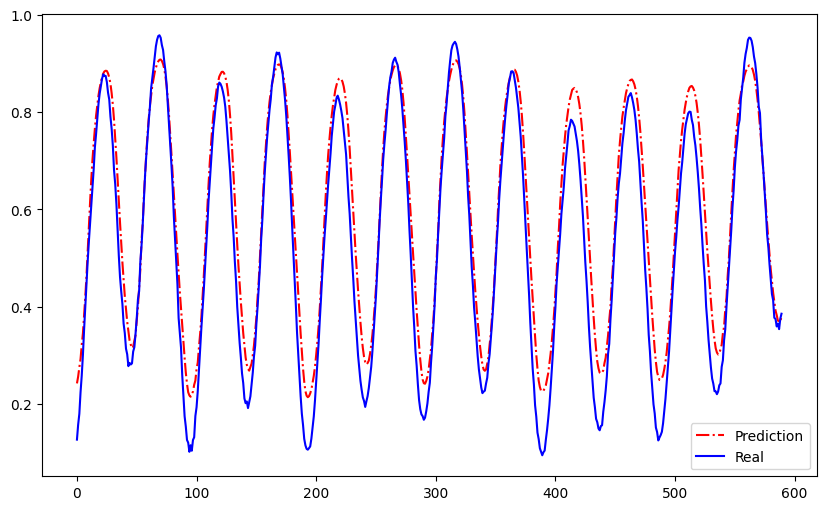

In [ ]:
import torch
from torch.utils.data import DataLoader
from config import Config

from utils.dataTools import *
from utils.models import CNNBiLSTM
from utils.trainer import CNNBiLstm_evaluate,CNNBiLstmtrain
if __name__ == '__main__':
    config = Config()

    print("Data loading...")
    dataset = mydataReader("./dataProcessed/janu.csv")

    (train_X, train_Y), (val_X, val_Y), (test_X, test_Y) = dataset.split(
        lookback=config.lookback, n_steps=config.n_steps, trainSet_ratio=0.7, valSet_ratio=0.1)

    trainSet = custom_dataset(train_X, train_Y)
    valSet = custom_dataset(val_X, val_Y)
    testSet = custom_dataset(test_X, test_Y)

    train_loader = DataLoader(trainSet, batch_size=config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(valSet, batch_size=config.batch_size,
                            shuffle=False, pin_memory=True, num_workers=4, drop_last=False)
    test_loader = DataLoader(testSet, batch_size=config.batch_size,
                             shuffle=False, pin_memory=True, num_workers=4, drop_last=False)

    print("Model loading...")
    model = CNNBiLSTM(hidden_size=12, num_layers=2).to(config.device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                  lr=config.learning_rate, weight_decay=config.weight_decay)

    print("Training...")
    model = CNNBiLstmtrain(model,
                           trainloader=train_loader,
                           valloader=val_loader,
                           criterion=criterion,
                           optimizer=optimizer,
                           config=config)

    print("Testing...")
    CNNBiLstm_evaluate(model, test_loader, config)
